In [1]:
"""
Testing PSSE functionality for SoftwareX Paper
Imports 
"""
# Import the class explicitly
from WecGrid import WecGrid

# Instantiate the class
wec_grid = WecGrid(case="../WecGrid/models/grid_models/11BUS_KUNDUR.RAW")



In [2]:
# init both PSSE and PyPSA
wec_grid.initialize_psse("fnsl")

wec_grid.initialize_pypsa("fnsl")


    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.

 Could not find entry point runpy_add_to_sys_path

           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.5.2

             INITIATED ON TUE, JAN 28 2025  17

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-01-28 17:00:08.924718'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.069976 seconds


pyPSA initialized
PyPSA initialized with case file: 11BUS_KUNDUR.RAW.


In [3]:
wec_grid.pypsaObj.current_df()

,Bus,v_mag_pu_set,p,q,v_mag_pu,v_ang,control,generator,type
0,1,NaN,700.000000,185.007115,1.030000,0.472464,PV,G0,2
1,2,NaN,700.000000,234.588232,1.010000,0.302045,PV,G1,2
2,3,NaN,719.092549,176.003044,1.030000,0.000000,Slack,G2,3
3,4,NaN,700.000000,202.056445,1.010000,-0.177883,PV,G3,2
4,5,NaN,0.000000,0.000000,1.006457,0.359681,PQ,NaN,1
5,6,NaN,0.000000,0.000000,0.978133,0.183672,PQ,NaN,1
6,7,NaN,-967.000000,-100.000000,0.961020,0.036906,PQ,NaN,1
7,8,NaN,0.000000,0.000000,0.948616,-0.205168,PQ,NaN,1
8,9,NaN,-1767.000000,-100.000000,0.971372,-0.442484,PQ,NaN,1
9,10,NaN,0.000000,0.000000,0.983464,-0.295611,PQ,NaN,1


In [ ]:
wec_grid.psseObj.dataframe


,BUS_ID,Bus,BASE,PU,ANGLE,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,20.0,1.030000,0.472464,2,700.000000,185.007080,NaN,NaN,700.000000,185.007080,0.000000,0.000000,0.000000,0.000000
1,2,BUS 2,20.0,1.010000,0.302045,2,700.000000,234.588287,NaN,NaN,700.000000,234.588287,0.000000,0.000000,0.000000,0.000000
2,3,BUS 3,20.0,1.030000,0.000000,3,719.092529,176.003021,NaN,NaN,719.092529,176.003021,0.000000,0.000000,0.000000,0.000000
3,4,BUS 4,20.0,1.010000,-0.177883,2,700.000000,202.056503,NaN,NaN,700.000000,202.056503,0.000000,0.000000,0.000000,0.000000
4,5,BUS 5,230.0,1.006457,0.359681,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
5,6,BUS 6,230.0,0.978133,0.183672,1,NaN,NaN,NaN,NaN,NaN,NaN,-0.000048,0.000003,0.000048,3.079174
6,7,BUS 7,230.0,0.961020,0.036906,1,NaN,NaN,967.0,100.0,-967.000000,-100.000000,0.000000,-0.000012,0.000012,-1.570796
7,8,BUS 8,230.0,0.948616,-0.205168,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000003,0.000003,1.570796
8,9,BUS 9,230.0,0.971372,-0.442484,1,NaN,NaN,1767.0,100.0,-1767.000000,-100.000000,0.000000,-0.000024,0.000024,-1.570796
9,10,BUS 10,230.0,0.983464,-0.295611,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.000006,0.000006,-1.570796


In [5]:
# add a wec to the WEC-GRID model, this should add a bus, line, and wec to both PSSE and pyPSA models
wec_grid.create_wec(ID=11, model="RM3", from_bus=1, to_bus=12) 

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-01-28 17:00:08.924718'], dtype='datetime64[ns]', name='snapshot', freq=None)


Bus 12 added successfully.


INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.065978 seconds



 Bus 12 [RM3-11      20.000] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          1               2      IDE
    0.00000         20.0000      BASKV
    1.10000         1.05000      NMAXV
   0.900000        0.950000      NMINV
 "            "  "RM3-11      "  NAME
Bus 12 added successfully.

 Plant at bus 12 [RM3-11      20.000] added. Data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          0              12      IREG
    100.000         10.0000      RMPCT
Plant data added successfully to bus 12.

 Machine "11" at bus 12 [RM3-11      20.000] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    9999.00         1.00000      QT
   -9999.00        -1.00000      QB
    9999.00         3.00000      PT
   -9999.00        -0.00000      PB
    0.00000        0.500000E-02  ZR
    1.00000        0.100000      ZX
    1.00000         0.00000      WPF
Generator 11 ad

In [6]:
# review df now that we have a wec bus
wec_grid.pypsaObj.current_df()

,Bus,v_mag_pu_set,p,q,v_mag_pu,v_ang,control,generator,type
0,1,NaN,700.000000,266.798467,1.030000,0.470556,PV,G0,2
1,2,NaN,700.000000,233.898835,1.010000,0.300489,PV,G1,2
2,3,NaN,719.795682,176.116320,1.030000,0.000000,Slack,G2,3
3,4,NaN,700.000000,201.922558,1.010000,-0.178178,PV,G3,2
4,5,NaN,0.000000,0.000000,1.006519,0.357909,PQ,NaN,1
5,6,NaN,0.000000,0.000000,0.978246,0.182130,PQ,NaN,1
6,7,NaN,-967.000000,-100.000000,0.961190,0.035483,PQ,NaN,1
7,8,NaN,0.000000,0.000000,0.948857,-0.206041,PQ,NaN,1
8,9,NaN,-1767.000000,-100.000000,0.971440,-0.442839,PQ,NaN,1
9,10,NaN,0.000000,0.000000,0.983486,-0.295904,PQ,NaN,1


In [7]:
# review the PSSE model
wec_grid.psseObj.dataframe


,BUS_ID,Bus,BASE,PU,ANGLE,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,20.0,1.030000,0.472464,2,700.000000,184.007080,NaN,NaN,700.000000,184.007080,3.108624e-13,0.000003,0.000003,1.570796
1,2,BUS 2,20.0,1.010000,0.302045,2,700.000000,234.588287,NaN,NaN,700.000000,234.588287,0.000000e+00,0.000000,0.000000,0.000000
2,3,BUS 3,20.0,1.030000,0.000000,3,719.092529,176.003021,NaN,NaN,719.092529,176.003021,0.000000e+00,0.000000,0.000000,0.000000
3,4,BUS 4,20.0,1.010000,-0.177883,2,700.000000,202.056503,NaN,NaN,700.000000,202.056503,0.000000e+00,0.000000,0.000000,0.000000
4,5,BUS 5,230.0,1.006457,0.359681,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000
5,6,BUS 6,230.0,0.978133,0.183672,1,NaN,NaN,NaN,NaN,NaN,NaN,-4.768372e-05,0.000003,0.000048,3.079174
6,7,BUS 7,230.0,0.961020,0.036906,1,NaN,NaN,967.0,100.0,-967.000000,-100.000000,0.000000e+00,-0.000012,0.000012,-1.570796
7,8,BUS 8,230.0,0.948616,-0.205168,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000003,0.000003,1.570796
8,9,BUS 9,230.0,0.971372,-0.442484,1,NaN,NaN,1767.0,100.0,-1767.000000,-100.000000,0.000000e+00,-0.000024,0.000024,-1.570796
9,10,BUS 10,230.0,0.983464,-0.295611,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-0.000006,0.000006,-1.570796


In [8]:
# review the pyPSA model
wec_grid.pypsaObj.current_df()

,Bus,v_mag_pu_set,p,q,v_mag_pu,v_ang,control,generator,type
0,1,NaN,700.000000,266.798467,1.030000,0.470556,PV,G0,2
1,2,NaN,700.000000,233.898835,1.010000,0.300489,PV,G1,2
2,3,NaN,719.795682,176.116320,1.030000,0.000000,Slack,G2,3
3,4,NaN,700.000000,201.922558,1.010000,-0.178178,PV,G3,2
4,5,NaN,0.000000,0.000000,1.006519,0.357909,PQ,NaN,1
5,6,NaN,0.000000,0.000000,0.978246,0.182130,PQ,NaN,1
6,7,NaN,-967.000000,-100.000000,0.961190,0.035483,PQ,NaN,1
7,8,NaN,0.000000,0.000000,0.948857,-0.206041,PQ,NaN,1
8,9,NaN,-1767.000000,-100.000000,0.971440,-0.442839,PQ,NaN,1
9,10,NaN,0.000000,0.000000,0.983486,-0.295904,PQ,NaN,1


In [9]:
# check the viz function of PSSE
wec_grid.psseObj.viz()

In [10]:
# check the viz function of pyPSA
wec_grid.pypsaObj.viz()

In [11]:
# Run an AC injection of the PSSE model
time = wec_grid.wecObj_list[0].dataframe.time.to_list()[-1] # grab the last time step
wec_grid.psseObj.ac_injection(start=0, end=(time))



 No power flow data changed for machine "11" at bus 12 [RM3-11      20.000]

 Power flow data changed for bus 12 [RM3-11      20.000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.03000         1.00000      VM

 ERROR: Conflicting voltage setpoints for bus 1 [BUS 1       20.000]; using 1.03

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      5     )    0.0000(     11     )
                                                             0.00000(      8     )   0.00000(      5     )
   1         0.0000(      9     )    0.0000(     10     )
                                                             0.00000(      8     )   0.00000(      9     )
   2         0.0000(     11     )    0.0000(     11     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 9 [BUS 9       230.00]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
 

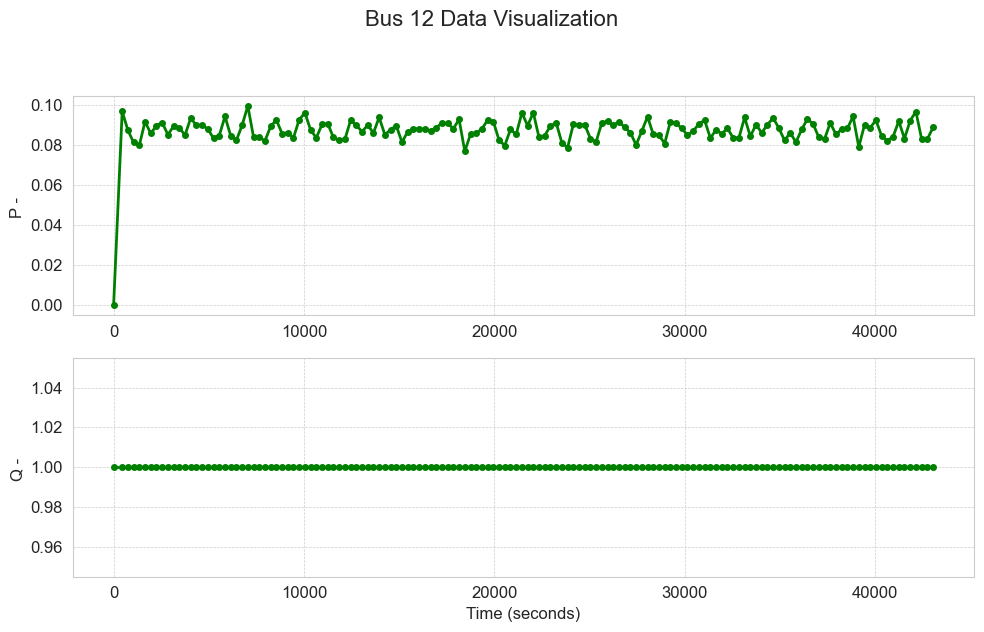

In [12]:
wec_grid.psseObj.plot_bus(bus_num=12, time=[0.0, time])

In [13]:
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-01-28 17:05:08.924718', '2025-01-28 17:10:08.924718',
               '2025-01-28 17:15:08.924718', '2025-01-28 17:20:08.924718',
               '2025-01-28 17:25:08.924718', '2025-01-28 17:30:08.924718',
               '2025-01-28 17:35:08.924718', '2025-01-28 17:40:08.924718',
               '2025-01-28 17:45:08.924718', '2025-01-28 17:50:08.924718',
               ...
               '2025-01-29 04:15:08.924718', '2025-01-29 04:20:08.924718',
               '2025-01-29 04:25:08.924718', '2025-01-29 04:30:08.924718',
               '2025-01-29 04:35:08.924718', '2025-01-29 04:40:08.924718',
               '2025-01-29 04:45:08.924718', '2025-01-29 04:50:08.924718',
               '2025-01-29 04:55:08.924718', '2025-01-29 05:00:08.924718'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')


INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.041989 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.047985 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.058983 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.053982 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.047768 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.047985 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.048987 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.047998 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.046984 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iterations with error of 0.000000 in 0.044999 seconds
INFO:pypsa.pf:Newton-Raphson solved in 5 iteration

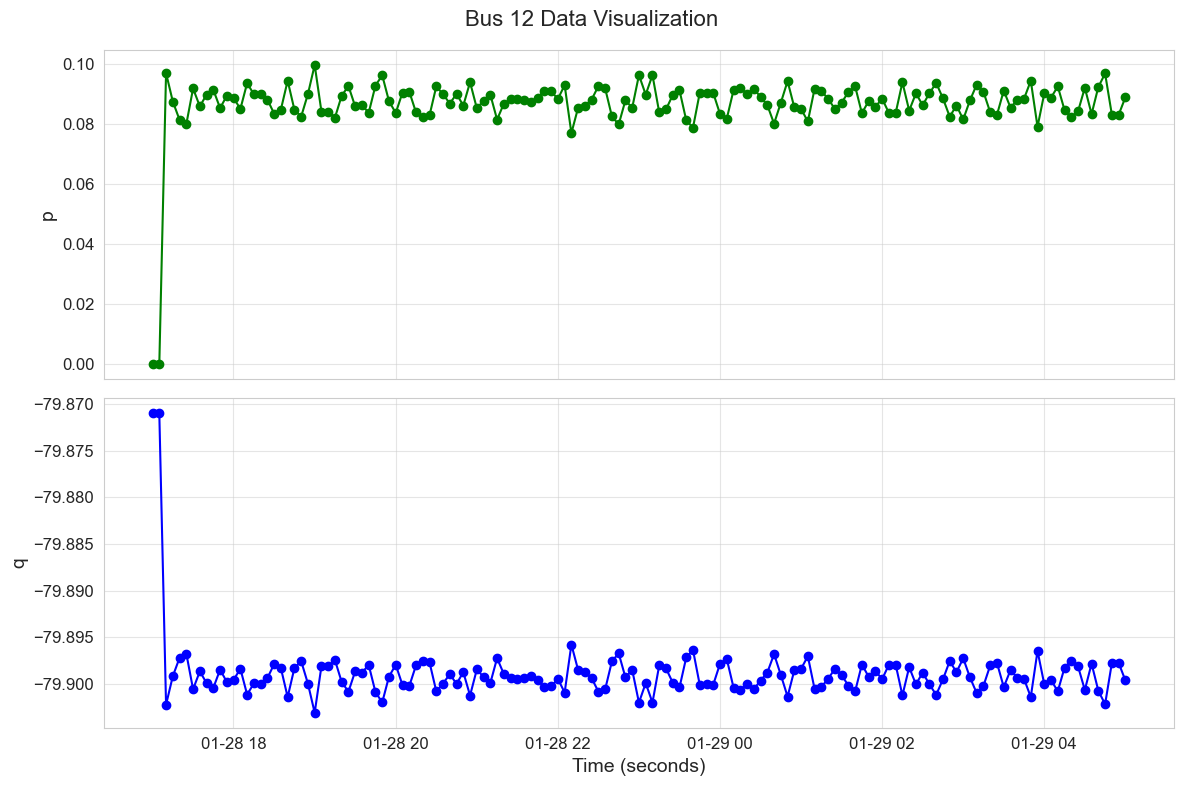

In [14]:
wec_grid.pypsaObj.plot_bus(12)